In [25]:
import pandas as pd

df = pd.read_csv('Scopus-10-Analyze-Year-2.csv', sep=";")

df.to_excel('Scopus-10-Analyze-Year-2.xlsx', index=False)


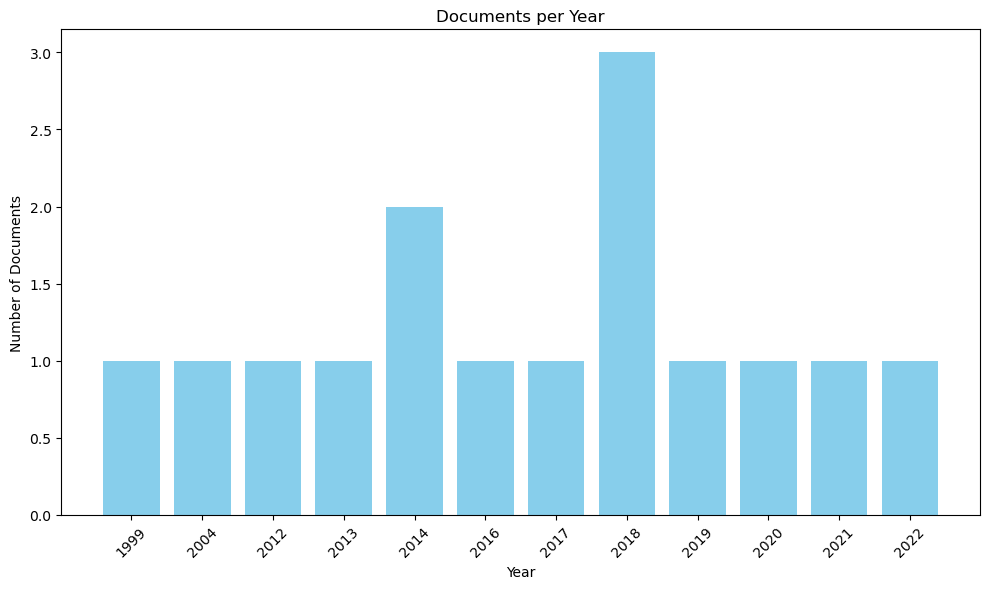

In [5]:
import matplotlib.pyplot as plt

# Read data
annot = pd.read_excel('Scopus-10-Analyze-Year-2.xlsx')

# Sort by Year
annot_sorted = annot.sort_values('Year')

# Plot
plt.figure(figsize=(10, 6))
plt.bar(annot_sorted['Year'].astype(str), annot_sorted['Documents'], color='skyblue')
plt.xlabel('Year')
plt.ylabel('Number of Documents')
plt.title('Documents per Year')
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig('documents_per_year.png', dpi=300)

plt.show()


In [11]:
import pandas as pd

df = pd.read_csv('Scopus-10-Analyze-document.csv', sep=";")

df.to_excel('Scopus-10-Analyze-document.xlsx', index=False)


Index(['Document type', 'Number'], dtype='object')


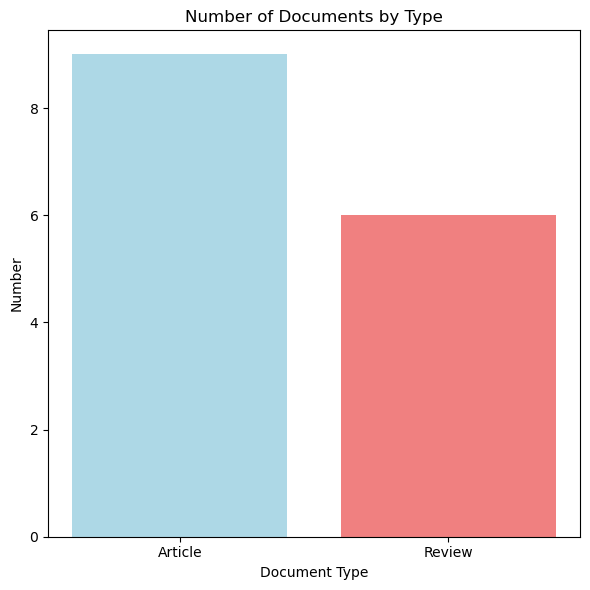

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Read Excel file
annot = pd.read_excel('Scopus-10-Analyze-document.xlsx')

print(annot.columns)

# Plot
plt.figure(figsize=(6, 6))
plt.bar(annot['Document type'], annot['Number'], color=['lightblue', 'lightcoral'])
plt.xlabel('Document Type')
plt.ylabel('Number')
plt.title('Number of Documents by Type')
plt.tight_layout()

# Save the plot before showing
plt.savefig('document_type_chart.png', dpi=300)

plt.show()


In [17]:
import pandas as pd

df = pd.read_csv('Scopus-10-Analyze-Subject.csv', sep=";")

df.to_excel('Scopus-10-Analyze-Subject.xlsx', index=False)


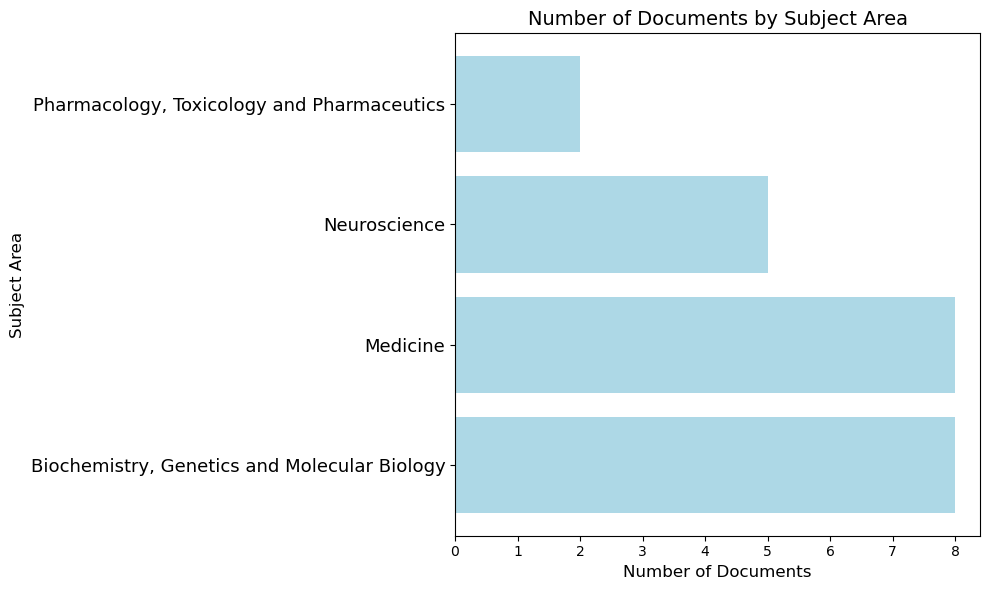

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the Excel file
df = pd.read_excel('Scopus-10-Analyze-Subject.xlsx')

# Clean column names and remove spaces just in case
df.columns = df.columns.str.strip()

# Plot
plt.figure(figsize=(10, 6))
plt.barh(df.iloc[:, 0], df.iloc[:, 1], color='lightblue')
plt.xlabel('Number of Documents', fontsize=12)
plt.ylabel('Subject Area', fontsize=12)
plt.title('Number of Documents by Subject Area', fontsize=14)

# Increase font size of Y-axis labels
plt.yticks(fontsize=13)

plt.tight_layout()

plt.savefig('subject_area_chart.png', dpi=300)
plt.show()



In [3]:
pip install PyPDF2

Note: you may need to restart the kernel to use updated packages.


In [7]:
import PyPDF2
import re
from collections import Counter

# --- CONFIGURATION ---
PDF_PATH = 'Memoria_TFG_Pijoan_MariaPau.pdf'
COUNT_FULL_AUTHOR_BLOCK = False  # True = contar bloques completos ("Vyas et al.")

# --- TEXT EXTRACTION ---
with open(PDF_PATH, 'rb') as file:
    reader = PyPDF2.PdfReader(file)
    text = "".join(page.extract_text() or "" for page in reader.pages)

# --- NORMALIZE WHITESPACE AND COMMON OCR SPLITS ---
text = text.replace('\xa0', ' ')
text = re.sub(r'\s+', ' ', text)

# --- FIX COMMON OCR SPLITS ---
# Unir fragmentos mal separados (ajustar con base en errores encontrados)
ocr_fixes = {
    r'\bP andolfo\b': 'Pandolfo',
    r'\bA rranz Gibert\b': 'Arranz Gibert',
    r'\bZ úñiga Cabrera\b': 'Zúñiga Cabrera',
    r'\bO rera Clemente\b': 'Orera Clemente',
    r'\bS anz Alcázar\b': 'Sanz Alcázar'
}
for pattern, replacement in ocr_fixes.items():
    text = re.sub(pattern, replacement, text)

# --- EXTRACT CITATIONS (e.g., "(Vyas et al., 2012)" or "(Pandolfo, 2009)") ---
citation_pattern = re.compile(r'\(([^()]+?,\s?\d{4}[a-z]?)\)')
citations = citation_pattern.findall(text)

# --- EXTRACT AUTHORS ---
def extract_primary_authors(citations):
    authors = []
    for citation in citations:
        author_part = citation.rsplit(',', 1)[0].strip()
        # Handle "Surname et al."
        match = re.match(r'([A-Za-zÀ-ÿ\-\' ]+?)\s*et\s*al\.', author_part, re.UNICODE | re.IGNORECASE)
        if match:
            authors.append(match.group(1).strip())
        # Handle multiple authors with '&' or 'and'
        elif '&' in author_part:
            authors.extend(a.strip() for a in author_part.split('&'))
        elif ' and ' in author_part:
            authors.extend(a.strip() for a in author_part.split(' and '))
        else:
            authors.append(author_part.strip())
    return authors

if COUNT_FULL_AUTHOR_BLOCK:
    author_list = [citation.rsplit(',', 1)[0].strip() for citation in citations]
else:
    author_list = extract_primary_authors(citations)

# --- COUNT AND DISPLAY ---
author_counts = Counter(author_list)

print("Citation counts:")
for author, count in author_counts.most_common():
    print(f"{author}: {count} citations")

Citation counts:
Vyas: 12 citations
Puccio: 10 citations
Mosbach: 9 citations
Shaban: 8 citations
Britti: 4 citations
Alper: 3 citations
Narayanan: 3 citations
Williams: 3 citations
Jesus: 3 citations
Kwon: 3 citations
Arranz Gibert: 3 citations
Campuzano: 2 citations
Pandolfo: 2 citations
Clayton: 2 citations
Baile: 2 citations
Zúñiga Cabrera: 1 citations
Orera Clemente: 1 citations
Spacey: 1 citations
Sanz Alcázar: 1 citations
Pastore: 1 citations
Chandran: 1 citations
Perdomini: 1 citations
Kalef-Ezra: 1 citations
Fil: 1 citations
Monnier: 1 citations
Kilikevicius: 1 citations
Schreiber: 1 citations
Alemany-Perna: 1 citations
Mazzara: 1 citations
Gaj: 1 citations
Abeti: 1 citations
Lee: 1 citations
Forbes: 1 citations
Krishnamurthy: 1 citations
Nhàn: 1 citations
Clark: 1 citations
Davis: 1 citations
Basak: 1 citations
Khan: 1 citations
Prades: 1 citations
Wei: 1 citations
Maani: 1 citations
Rayapureddi: 1 citations


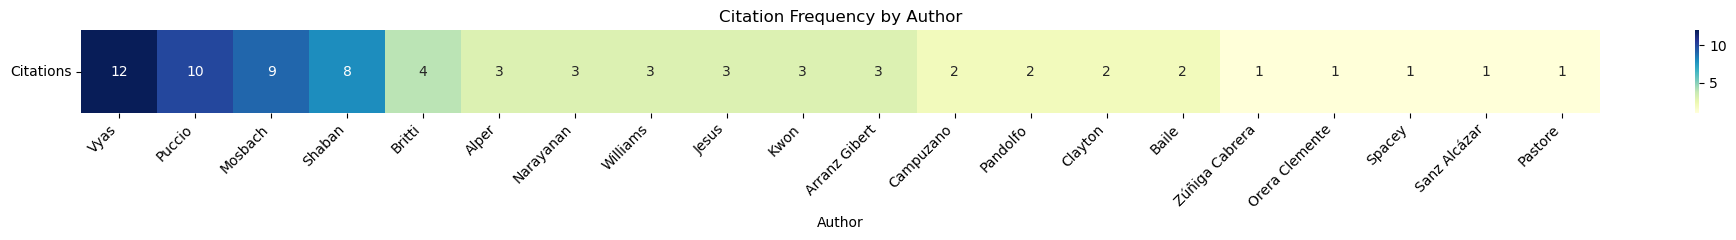

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Suppose you have the author_counts Counter from the previous script
# Example: author_counts = Counter(authors)

# Get the most common authors (you can limit to top N if you have many)
top_n = 20  # Show top 20 authors
sorted_counts = author_counts.most_common(top_n)
authors, counts = zip(*sorted_counts)

# Convert to a 2D array for heatmap (1 row, len(authors) columns)
data = np.array([counts])

plt.figure(figsize=(max(10, len(authors)), 2.5))
sns.heatmap(data, annot=True, fmt="d", cmap="YlGnBu", 
            xticklabels=authors, yticklabels=['Citations'])

plt.xlabel('Author')
plt.title('Citation Frequency by Author')
plt.yticks(rotation=0)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.savefig('Citation frequency.png', dpi=300)
plt.show()
